# Data Gathering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import requests
import tweepy
import json

arch_df: 'twitter-archive-enhanced-2.csv'<br> 
ima_df: 'image_predictions.tsv'<br> 
tweet_df: 'created dataframe with jsonfile'

In [2]:
arch_df = pd.read_csv('twitter-archive-enhanced-2.csv')

In [3]:
arch_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [5]:
ima_df = pd.read_csv('image_predictions.tsv', sep='\t', encoding= 'utf-8')
ima_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
# Tweeter API
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [7]:
#Create data frame
tweet_data = []

tweet_file = open('tweet-json.txt', 'r')
for tweets in tweet_file:
    try:
        tweet = json.loads(tweets)
        tweet_data.append(tweet)
    except:
        continue

tweet_file.close()

In [8]:
tweet_df = pd.DataFrame()
tweet_df['tweet_id'] = list(map(lambda tweet: tweet['id'], tweet_data))
tweet_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweet_data))
tweet_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweet_data))
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [9]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [10]:
tweet_df.to_csv('tweet_df.csv', index = False)

In [11]:
tweet_df = pd.read_csv('tweet_df.csv')

In [12]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assessing

record quality and tidness issue

### arch_df: 'twitter-archive-enhanced-2.csv'<br> 
### ima_df: 'image_predictions.tsv'<br> 
### tweet_df: 'created dataframe with jsonfile'

In [13]:
arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
arch_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
arch_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [16]:
#find null value in the data
arch_df[arch_df['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [17]:
arch_df['expanded_urls'].isnull().sum()

59

In [18]:
arch_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
arch_df['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Tucker      10
Lola        10
Penny       10
Winston      9
Bo           9
the          8
Sadie        8
Buddy        7
Toby         7
Bailey       7
an           7
Daisy        7
Dave         6
Leo          6
Stanley      6
Rusty        6
Bella        6
Koda         6
Scout        6
Milo         6
Oscar        6
Jax          6
Jack         6
Sunny        5
          ... 
Jeffrie      1
Monkey       1
Jett         1
Dunkin       1
Jed          1
Maya         1
Kendall      1
Flash        1
Taco         1
Birf         1
Kramer       1
Brooks       1
Alf          1
Dylan        1
Batdog       1
Asher        1
Chesney      1
Arlen        1
Aiden        1
Brockly      1
Snoopy       1
Yukon        1
Jarod        1
Antony       1
Dale         1
Walker       1
Edgar        1
Shelby       1
Millie       1
Lucky        1
Name: name, Length: 957, dtype: int64

In [20]:
arch_df.query("doggo == 'None' and floofer == 'None' and pupper == 'None' and puppo == 'None'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None


In [21]:
print(list(arch_df))

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [22]:
arch_df['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Tucker      10
Lola        10
Penny       10
Winston      9
Bo           9
the          8
Sadie        8
Buddy        7
Toby         7
Bailey       7
an           7
Daisy        7
Dave         6
Leo          6
Stanley      6
Rusty        6
Bella        6
Koda         6
Scout        6
Milo         6
Oscar        6
Jax          6
Jack         6
Sunny        5
          ... 
Jeffrie      1
Monkey       1
Jett         1
Dunkin       1
Jed          1
Maya         1
Kendall      1
Flash        1
Taco         1
Birf         1
Kramer       1
Brooks       1
Alf          1
Dylan        1
Batdog       1
Asher        1
Chesney      1
Arlen        1
Aiden        1
Brockly      1
Snoopy       1
Yukon        1
Jarod        1
Antony       1
Dale         1
Walker       1
Edgar        1
Shelby       1
Millie       1
Lucky        1
Name: name, Length: 957, dtype: int64

In [23]:
arch_df[arch_df['name'] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [24]:
print(arch_df['source'][93])

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>


In [25]:
print(arch_df['text'][7])

When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq


In [26]:
print(arch_df['text'][2329])

Those are sunglasses and a jean jacket. 11/10 dog cool af https://t.co/uHXrPkUEyl


In [27]:
sum(arch_df['in_reply_to_status_id'].isnull())

2278

In [28]:
sum(arch_df['retweeted_status_id'].isnull())

2175

In [29]:
arch_df['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [30]:
arch_df['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [31]:
arch_df['timestamp']

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
19      2017-07-21 01:02:36 +0000
20      2017-07-20 16:49:33 +0000
21      2017-07-19 16:06:48 +0000
22      2017-07-19 03:39:09 +0000
23      2017-07-19 00:47:34 +0000
24      2017-07-18 16:08:03 +0000
25      2017-07-18 00:07:08 +0000
26      2017-07-17 16:17:36 +0000
27      2017-07-16 23:58:41 +0000
28      2017-07-16 20:14:00 +0000
29      2017-0

In [32]:
arch_df.query("rating_denominator > 10 or rating_denominator < 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [33]:
print(arch_df['text'][313])

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho


In [34]:
print(arch_df['text'][784])

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…


In [35]:
arch_df.duplicated().sum()

0

In [36]:
arch_df['retweeted_status_id'].isnull().sum()

2175

In [37]:
ima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [38]:
ima_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [39]:
ima_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [40]:
ima_df['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [41]:
ima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [42]:
ima_df['tweet_id'].duplicated().sum()

0

In [43]:
ima_df['jpg_url'].duplicated().sum()

66

In [44]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [45]:
tweet_df.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [46]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


#### arch_df
<br>
- Timestamp shuould be in datetime format<br>
- On name column 'None' and 'a' should be in NA<br>
- Dog stage can be used as dummy variable with data cleaning<br>
- Eliminate outliers(High-leverage points) in rating denominator and rating numerator<br>
- Scale rating denominator and rating numerator<br>
- You only want original ratings (no retweets) that have images.
<br><br>

#### ima_df
<br>
- there are 66 duplicated jpg_url<br>
- Use only p1(prediction 1), P1 is the higest prediction<br>
<br><br>

#### tweet_df
<br>
- There are no problem founded in the dataframe, only tweet_id, retweet_count, and favorite_count were extracted
<br><br>

#### All
<br>
- Convert data type in tweet_id from int to str<br>
- All three datafram will be merged after cleaning process

# Cleaning

In [47]:
arch_clean = arch_df.copy()
ima_clean = ima_df.copy()
tweet_clean = tweet_df.copy()

### arch_clean

#### define
- Timestamp shuould be in datetime format

#### code

In [48]:
arch_clean['timestamp'] = pd.to_datetime(arch_clean['timestamp'])

#### test

In [49]:
arch_clean.info() #Now timestamp data type is datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

#### define
- On name column 'None' and 'a' should be in NA

#### code

In [50]:
arch_clean['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Tucker      10
Lola        10
Penny       10
Winston      9
Bo           9
the          8
Sadie        8
Buddy        7
Toby         7
Bailey       7
an           7
Daisy        7
Dave         6
Leo          6
Stanley      6
Rusty        6
Bella        6
Koda         6
Scout        6
Milo         6
Oscar        6
Jax          6
Jack         6
Sunny        5
          ... 
Jeffrie      1
Monkey       1
Jett         1
Dunkin       1
Jed          1
Maya         1
Kendall      1
Flash        1
Taco         1
Birf         1
Kramer       1
Brooks       1
Alf          1
Dylan        1
Batdog       1
Asher        1
Chesney      1
Arlen        1
Aiden        1
Brockly      1
Snoopy       1
Yukon        1
Jarod        1
Antony       1
Dale         1
Walker       1
Edgar        1
Shelby       1
Millie       1
Lucky        1
Name: name, Length: 957, dtype: int64

In [51]:
# arch_clean.name.replace(['to_replace=None', 'value=None', 'inplace=False', 'limit=None', 'regex=False', "method='pad'"],)

In [52]:
arch_clean['name'].replace('None', np.nan, inplace = True)
arch_clean['name'].replace('a', np.nan, inplace = True)

#### Test

In [53]:
arch_clean['name'].value_counts()

Charlie     12
Lucy        11
Cooper      11
Oliver      11
Lola        10
Penny       10
Tucker      10
Winston      9
Bo           9
the          8
Sadie        8
Toby         7
an           7
Bailey       7
Daisy        7
Buddy        7
Leo          6
Bella        6
Milo         6
Dave         6
Rusty        6
Jack         6
Stanley      6
Scout        6
Jax          6
Oscar        6
Koda         6
Larry        5
Finn         5
George       5
            ..
Callie       1
Fiji         1
Eevee        1
Ron          1
Snicku       1
Major        1
Mike         1
Sobe         1
Tom          1
Zooey        1
Jockson      1
Socks        1
Trigger      1
Pawnd        1
Vinscent     1
Strudel      1
Kallie       1
Dot          1
Jaycob       1
Divine       1
Tyrus        1
Opie         1
Ziva         1
Karl         1
Maude        1
Saydee       1
Humphrey     1
Diogi        1
Raphael      1
Lucky        1
Name: name, Length: 955, dtype: int64

In [54]:
arch_clean['name'].isnull().sum()

800

#### define
- Dog stage can be used as dummy variable with data cleaning ('None' = 0, 'stage' = 1)

#### code

In [55]:
arch_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [56]:
print('doggo stage values:', arch_clean.doggo.unique())
print('floofer stage values:', arch_clean.floofer.unique())
print('pupper stage values:', arch_clean.pupper.unique())
print('puppo stage values:', arch_clean.puppo.unique())

doggo stage values: ['None' 'doggo']
floofer stage values: ['None' 'floofer']
pupper stage values: ['None' 'pupper']
puppo stage values: ['None' 'puppo']


In [57]:
arch_clean['doggo'].replace('None', 0, inplace = True)
arch_clean['doggo'].replace('doggo', 1, inplace = True)
arch_clean['floofer'].replace('None', 0, inplace = True)
arch_clean['floofer'].replace('floofer', 1, inplace = True)
arch_clean['pupper'].replace('None', 0, inplace = True)
arch_clean['pupper'].replace('pupper', 1, inplace = True)
arch_clean['puppo'].replace('None', 0, inplace = True)
arch_clean['puppo'].replace('puppo', 1, inplace = True)

#### Test

In [58]:
arch_clean.doggo

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       1
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2326    0
2327    0
2328    0
2329    0
2330    0
2331    0
2332    0
2333    0
2334    0
2335    0
2336    0
2337    0
2338    0
2339    0
2340    0
2341    0
2342    0
2343    0
2344    0
2345    0
2346    0
2347    0
2348    0
2349    0
2350    0
2351    0
2352    0
2353    0
2354    0
2355    0
Name: doggo, Length: 2356, dtype: int64

In [59]:
arch_clean.floofer

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2326    0
2327    0
2328    0
2329    0
2330    0
2331    0
2332    0
2333    0
2334    0
2335    0
2336    0
2337    0
2338    0
2339    0
2340    0
2341    0
2342    0
2343    0
2344    0
2345    0
2346    0
2347    0
2348    0
2349    0
2350    0
2351    0
2352    0
2353    0
2354    0
2355    0
Name: floofer, Length: 2356, dtype: int64

In [60]:
arch_clean.pupper

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      1
       ..
2326    0
2327    0
2328    0
2329    0
2330    0
2331    0
2332    0
2333    0
2334    0
2335    0
2336    0
2337    0
2338    0
2339    0
2340    0
2341    0
2342    0
2343    0
2344    0
2345    0
2346    0
2347    0
2348    0
2349    0
2350    0
2351    0
2352    0
2353    0
2354    0
2355    0
Name: pupper, Length: 2356, dtype: int64

In [61]:
arch_clean.puppo

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      1
13      0
14      1
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2326    0
2327    0
2328    0
2329    0
2330    0
2331    0
2332    0
2333    0
2334    0
2335    0
2336    0
2337    0
2338    0
2339    0
2340    0
2341    0
2342    0
2343    0
2344    0
2345    0
2346    0
2347    0
2348    0
2349    0
2350    0
2351    0
2352    0
2353    0
2354    0
2355    0
Name: puppo, Length: 2356, dtype: int64

#### Define
- Eliminate outliers(High-leverage points) in rating denominator and rating numerator

#### Code

In [62]:
print(list(arch_clean))

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [63]:
arch_clean['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [64]:
arch_clean = arch_clean[arch_clean['rating_numerator'] < 15]

In [65]:
arch_clean['rating_denominator'].value_counts()

10    2321
11       3
20       2
15       1
2        1
Name: rating_denominator, dtype: int64

#### Test

In [66]:
arch_clean['rating_numerator'].value_counts()

12    558
11    464
10    461
13    351
9     158
8     102
7      55
14     54
5      37
6      32
3      19
4      17
1       9
2       9
0       2
Name: rating_numerator, dtype: int64

In [67]:
arch_clean['rating_denominator'].value_counts()

10    2321
11       3
20       2
15       1
2        1
Name: rating_denominator, dtype: int64

#### Define
- Scale rating denominator and rating numerator and drop original rating nuerator and denomiator

#### Code

In [68]:
arch_clean['rating'] = arch_clean['rating_numerator']/arch_clean['rating_denominator']

In [69]:
arch_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,0,0,0,0,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,0,0,0,0,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,0,0,0,0,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,0,0,0,0,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,0,0,0,0,1.2


In [70]:
arch_clean.drop(labels = 'rating_numerator', axis = 1, inplace = True)

In [71]:
arch_clean.drop(labels = 'rating_denominator', axis = 1, inplace = True)

#### Test

In [72]:
arch_clean['rating'].value_counts()

1.200000    558
1.100000    463
1.000000    461
1.300000    351
0.900000    156
0.800000    102
1.400000     54
0.700000     54
0.500000     38
0.600000     32
0.300000     19
0.400000     15
0.200000     11
0.100000      8
0.818182      2
0.000000      2
0.733333      1
0.636364      1
Name: rating, dtype: int64

In [73]:
arch_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,0,0,0,0,1.3


#### Define
- You only want original ratings. and drop all retweet columns

#### Code

In [74]:
arch_clean.shape

(2328, 16)

In [75]:
arch_clean['retweeted_status_id'].count()

179

In [76]:
arch_clean = arch_clean[arch_clean['retweeted_status_id'].isnull()]

### Test

In [77]:
arch_clean['retweeted_status_id'].count()

0

In [78]:
print(list(arch_clean))

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'rating']


### Define
- eliminate all unnecessary columns

#### Code

In [79]:
# drop all retweet columns
arch_clean.drop(labels = 'retweeted_status_id', axis = 1, inplace = True)
arch_clean.drop(labels = 'retweeted_status_user_id', axis = 1, inplace = True)
arch_clean.drop(labels = 'retweeted_status_timestamp', axis = 1, inplace = True)

In [80]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2149 non-null int64
in_reply_to_status_id    70 non-null float64
in_reply_to_user_id      70 non-null float64
timestamp                2149 non-null datetime64[ns]
source                   2149 non-null object
text                     2149 non-null object
expanded_urls            2098 non-null object
name                     1434 non-null object
doggo                    2149 non-null int64
floofer                  2149 non-null int64
pupper                   2149 non-null int64
puppo                    2149 non-null int64
rating                   2149 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 235.0+ KB


In [81]:
# drop in_reply_to_status_id and in_reply_user_id columns
arch_clean.drop(labels = 'in_reply_to_status_id', axis = 1, inplace = True)
arch_clean.drop(labels = 'in_reply_to_user_id', axis = 1, inplace = True)

In [82]:
arch_clean.drop(labels = 'source', axis = 1, inplace = True)
arch_clean.drop(labels = 'text', axis = 1, inplace = True)
arch_clean.drop(labels = 'expanded_urls', axis = 1, inplace = True)

#### Test

In [83]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id     2149 non-null int64
timestamp    2149 non-null datetime64[ns]
name         1434 non-null object
doggo        2149 non-null int64
floofer      2149 non-null int64
pupper       2149 non-null int64
puppo        2149 non-null int64
rating       2149 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 151.1+ KB


In [84]:

arch_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Define
- convert tweet_id data type to str

#### Code

In [85]:
arch_clean['tweet_id'] = arch_clean['tweet_id'].astype(str)

#### Test

In [86]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id     2149 non-null object
timestamp    2149 non-null datetime64[ns]
name         1434 non-null object
doggo        2149 non-null int64
floofer      2149 non-null int64
pupper       2149 non-null int64
puppo        2149 non-null int64
rating       2149 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 151.1+ KB


In [87]:
arch_clean['tweet_id'].dtype

dtype('O')

# ima_clean

#### Define
- there are 66 duplicated jpg_url remove them

#### Code

In [88]:
ima_clean['jpg_url'].duplicated().sum()

66

In [89]:
ima_clean.drop_duplicates('jpg_url', inplace = True)

#### Test

In [90]:
ima_clean['jpg_url'].duplicated().sum()

0

In [91]:
ima_clean.shape

(2009, 12)

#### Define
- Use only p1(prediction 1), P1 is the higest prediction drop others

#### code

In [92]:
ima_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [93]:
print(list(ima_clean))

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']


In [94]:
ima_clean.drop(labels = ['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)

#### Test

In [95]:
ima_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


#### Define
- convert tweet_id data type to str

#### Code

In [96]:
ima_clean['tweet_id'] = ima_clean['tweet_id'].astype(str)

#### Test

In [97]:
ima_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 96.1+ KB


In [98]:
ima_clean.tweet_id.dtype

dtype('O')

# tweet_clean

#### Define
- convert tweet_id data type to str

In [99]:
tweet_clean['tweet_id'] = tweet_clean['tweet_id'].astype(str)

#### Test

In [100]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [101]:
tweet_clean['tweet_id'].dtype

dtype('O')

# All Three

#### Define
- Merge all three dataset to one dataset

#### Code

In [102]:
df_clean = pd.merge(arch_clean, ima_clean, on = 'tweet_id')

In [103]:
df_clean = pd.merge(df_clean, tweet_clean, on = 'tweet_id')

#### Test

In [104]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1975 entries, 0 to 1974
Data columns (total 15 columns):
tweet_id          1975 non-null object
timestamp         1975 non-null datetime64[ns]
name              1387 non-null object
doggo             1975 non-null int64
floofer           1975 non-null int64
pupper            1975 non-null int64
puppo             1975 non-null int64
rating            1975 non-null float64
jpg_url           1975 non-null object
img_num           1975 non-null int64
p1                1975 non-null object
p1_conf           1975 non-null float64
p1_dog            1975 non-null bool
retweet_count     1975 non-null int64
favorite_count    1975 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(2), int64(7), object(4)
memory usage: 233.4+ KB


In [105]:
df_clean.head()

,tweet_id,timestamp,name,doggo,floofer,pupper,puppo,rating,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Phineas,0,0,0,0,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Tilly,0,0,0,0,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Archie,0,0,0,0,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Darla,0,0,0,0,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Franklin,0,0,0,0,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,9774,41048


# Save

In [106]:
df_clean.to_csv('final_data.csv', index=False)

# Acting on Wrangled Data

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [108]:
df = pd.read_csv('final_data.csv')

In [109]:
df.head()

,tweet_id,timestamp,name,doggo,floofer,pupper,puppo,rating,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Phineas,0,0,0,0,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Tilly,0,0,0,0,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Archie,0,0,0,0,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Darla,0,0,0,0,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Franklin,0,0,0,0,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,9774,41048


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 15 columns):
tweet_id          1975 non-null int64
timestamp         1975 non-null object
name              1387 non-null object
doggo             1975 non-null int64
floofer           1975 non-null int64
pupper            1975 non-null int64
puppo             1975 non-null int64
rating            1975 non-null float64
jpg_url           1975 non-null object
img_num           1975 non-null int64
p1                1975 non-null object
p1_conf           1975 non-null float64
p1_dog            1975 non-null bool
retweet_count     1975 non-null int64
favorite_count    1975 non-null int64
dtypes: bool(1), float64(2), int64(8), object(4)
memory usage: 218.0+ KB


In [111]:
df['tweet_id'] = df['tweet_id'].astype('str')

In [112]:
df.describe()

,doggo,floofer,pupper,puppo,rating,img_num,p1_conf,retweet_count,favorite_count
count,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000
mean,0.037468,0.004051,0.106835,0.011646,1.053850,1.204051,0.593799,2775.489114,8929.860759
std,0.189955,0.063532,0.308982,0.107312,0.219777,0.562582,0.272080,4693.558994,12259.050949
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.044333,16.000000,81.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.360447,622.500000,1956.500000
50%,0.000000,0.000000,0.000000,0.000000,1.100000,1.000000,0.587764,1350.000000,4138.000000
75%,0.000000,0.000000,0.000000,0.000000,1.200000,1.000000,0.844583,3224.500000,11378.500000
max,1.000000,1.000000,1.000000,1.000000,1.400000,4.000000,1.000000,79515.000000,132810.000000


In [113]:
import statsmodels.api as sm;

In [114]:
df['intercept'] = 1

lm = sm.OLS(df['rating'], df[['intercept', 'doggo', 'floofer', 'pupper', 'puppo', 'img_num', 'p1_conf', 'retweet_count', 'favorite_count']])
result = lm.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     67.17
Date:                Wed, 15 May 2019   Prob (F-statistic):           1.10e-97
Time:                        20:18:12   Log-Likelihood:                 429.13
No. Observations:                1975   AIC:                            -840.3
Df Residuals:                    1966   BIC:                            -790.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.9060      0.013     68.894      0.000       0.880       0.932
doggo              0.0679      0.023      2.891      0.004       0.022       0.114
floofer            0.1100      0.069      1.589      0.112      -0.026       0.246
pupper             0.0253      0.014      1.776      0.076      -0.003       0.053
puppo              0.0364      0.041      0.880      0.379      -0.045       0.117
img_num            0.0480      0.008      5.965      0.000       0.032       0.064
p1_conf            0.0298      0.017      1.798      0.072      -0.003       0.062
retweet_count  -1.885e-05    2.3e-06     -8.182      0.000   -2.34e-05   -1.43e-05
favorite_count  1.327e-05   8.87e-07     14.963      0.000    1.15e-05     1.5e-05
==============================================================================
Omnibus:                      711.792   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2818.321
Skew:                          -1.733   Prob(JB):                         0.00
Kurtosis:                       7.716   Cond. No.                     2.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
lm = sm.OLS(df['rating'], df[['intercept', 'doggo', 'floofer', 'pupper', 'puppo', 'img_num', 'p1_conf']])
result = lm.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     20.13
Date:                Wed, 15 May 2019   Prob (F-statistic):           5.83e-23
Time:                        20:36:19   Log-Likelihood:                 249.33
No. Observations:                1975   AIC:                            -484.7
Df Residuals:                    1968   BIC:                            -445.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9349      0.014     65.373      0.000       0.907       0.963
doggo          0.1235      0.025      4.877      0.000       0.074       0.173
floofer        0.1321      0.076      1.744      0.081      -0.016       0.281
pupper         0.0097      0.016      0.624      0.533      -0.021       0.040
puppo          0.1317      0.045      2.931      0.003       0.044       0.220
img_num        0.0678      0.009      7.750      0.000       0.051       0.085
p1_conf        0.0499      0.018      2.759      0.006       0.014       0.085
==============================================================================
Omnibus:                      558.375   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1553.457
Skew:                          -1.471   Prob(JB):                         0.00
Kurtosis:                       6.198   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
lm = sm.OLS(df['rating'], df[['intercept', 'doggo', 'floofer', 'puppo', 'img_num', 'p1_conf']])
result = lm.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     24.09
Date:                Wed, 15 May 2019   Prob (F-statistic):           1.35e-23
Time:                        20:40:16   Log-Likelihood:                 249.14
No. Observations:                1975   AIC:                            -486.3
Df Residuals:                    1969   BIC:                            -452.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9357      0.014     65.678      0.000       0.908       0.964
doggo          0.1237      0.025      4.884      0.000       0.074       0.173
floofer        0.1311      0.076      1.731      0.084      -0.017       0.280
puppo          0.1306      0.045      2.909      0.004       0.043       0.219
img_num        0.0679      0.009      7.767      0.000       0.051       0.085
p1_conf        0.0501      0.018      2.772      0.006       0.015       0.086
==============================================================================
Omnibus:                      560.889   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1567.437
Skew:                          -1.476   Prob(JB):                         0.00
Kurtosis:                       6.215   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

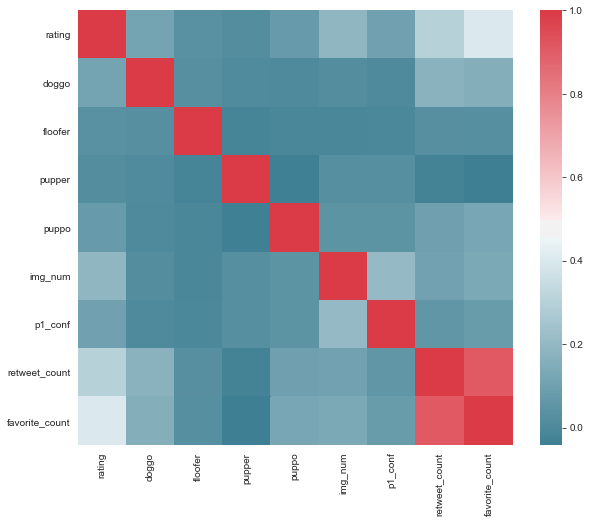

In [137]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df[['rating', 'doggo', 'floofer', 'pupper', 'puppo', 'img_num', 'p1_conf', 'retweet_count', 'favorite_count']].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

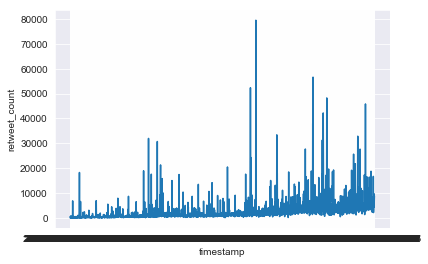

In [160]:
sns.lineplot(data = df, x = 'timestamp', y = 'retweet_count')

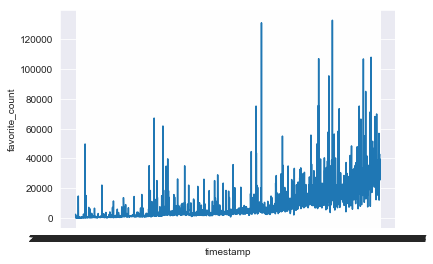

In [161]:
sns.lineplot(data = df, x = 'timestamp', y = 'favorite_count')

<ErrorbarContainer object of 3 artists>

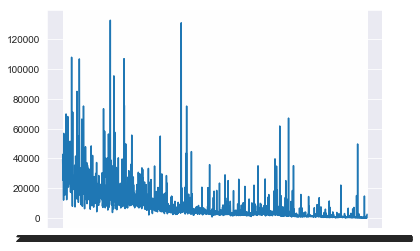

In [162]:
plt.errorbar(data = df, x = 'timestamp', y = 'favorite_count')

Text(0, 0.5, 'Favorite Count')

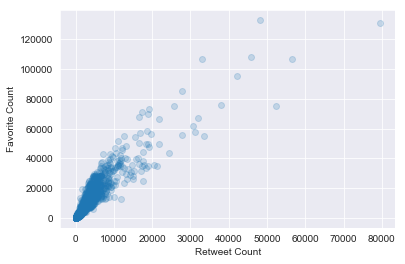

In [163]:
plt.scatter(data = df, x = 'retweet_count', y = 'favorite_count', alpha = 0.2)
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')

C:\Users\chi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Favorite Count')

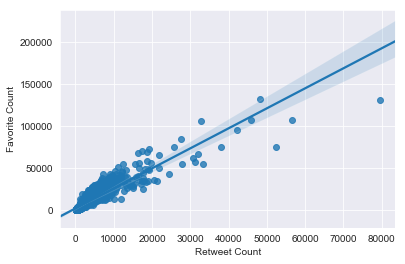

In [164]:
sns.regplot(data = df, x = 'retweet_count', y ='favorite_count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')

C:\Users\chi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Picture confidence')

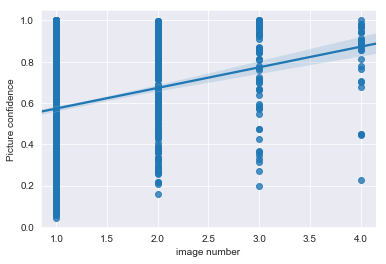

In [138]:
sns.regplot(data = df, x = 'img_num', y ='p1_conf')
plt.xlabel('image number')
plt.ylabel('Picture confidence')

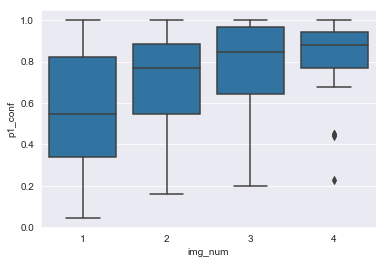

In [166]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = 'img_num', y ='p1_conf', color = base_color)

In [139]:
df[df['floofer'] == 1]

,tweet_id,timestamp,name,doggo,floofer,pupper,puppo,rating,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count,intercept
40,883360690899218434,2017-07-07 16:22:55,Grizzwald,0,1,0,0,1.3,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,1,chow,0.987997,True,3825,22986,1
154,854010172552949760,2017-04-17 16:34:26,NaN,1,1,0,0,1.1,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,1,English_springer,0.354733,True,3433,17169,1
427,800388270626521089,2016-11-20 17:20:08,Doc,0,1,0,0,1.2,https://pbs.twimg.com/media/CxuM3oZW8AEhO5z.jpg,2,golden_retriever,0.359860,True,3265,12456,1
556,776218204058357768,2016-09-15 00:36:55,NaN,0,1,0,0,1.3,https://pbs.twimg.com/media/CsWuVEdWcAAqbe9.jpg,1,Samoyed,0.940326,True,18497,33345,1
725,749317047558017024,2016-07-02 19:01:20,Blu,0,1,0,0,1.2,https://pbs.twimg.com/ext_tw_video_thumb/74931...,1,wire-haired_fox_terrier,0.155144,True,2509,6076,1
815,737445876994609152,2016-05-31 00:49:32,NaN,0,1,0,0,1.3,https://pbs.twimg.com/media/CjvvHBwUoAE55WZ.jpg,1,Samoyed,0.400568,True,5048,11302,1
832,733822306246479872,2016-05-21 00:50:46,Moose,0,1,0,0,1.0,https://pbs.twimg.com/media/Ci8Pfg_UUAA2m9i.jpg,1,Lhasa,0.457356,True,1141,4015,1
1272,685307451701334016,2016-01-08 03:50:03,Petrick,0,1,0,0,1.1,https://pbs.twimg.com/media/CYKzfTTWMAEeTN7.jpg,1,Pomeranian,0.963176,True,496,2262,1


In [140]:
doggo = df[df['doggo'] == 1]
pupper = df[df['pupper'] == 1]
puppo = df[df['puppo'] == 1]
floofer = df[df['floofer'] == 1]

In [141]:
doggo.describe()

,doggo,floofer,pupper,puppo,rating,img_num,p1_conf,retweet_count,favorite_count,intercept
count,74.0,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.0
mean,1.0,0.013514,0.121622,0.013514,1.178378,1.256757,0.601791,6868.905405,18881.932432,1.0
std,0.0,0.116248,0.329079,0.116248,0.160709,0.620667,0.269230,12115.539252,21259.006110,0.0
min,1.0,0.000000,0.000000,0.000000,0.500000,1.000000,0.100896,725.000000,2593.000000,1.0
25%,1.0,0.000000,0.000000,0.000000,1.100000,1.000000,0.395049,2049.500000,8254.500000,1.0
50%,1.0,0.000000,0.000000,0.000000,1.200000,1.000000,0.603508,3106.000000,12029.000000,1.0
75%,1.0,0.000000,0.000000,0.000000,1.300000,1.000000,0.841722,5191.000000,19863.750000,1.0
max,1.0,1.000000,1.000000,1.000000,1.400000,4.000000,0.999962,79515.000000,131075.000000,1.0


C:\Users\chi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'doggo stage')

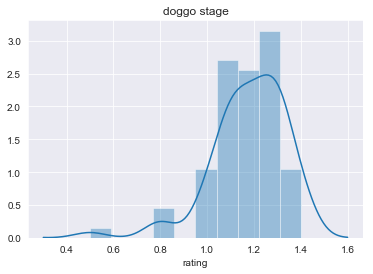

In [147]:
sns.distplot(doggo['rating'])
plt.title('doggo stage')

Text(0.5, 1.0, 'pupper stage')

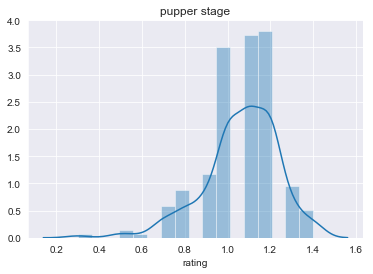

In [148]:
sns.distplot(pupper['rating'])
plt.title('pupper stage')

Text(0.5, 1.0, 'puppo stage')

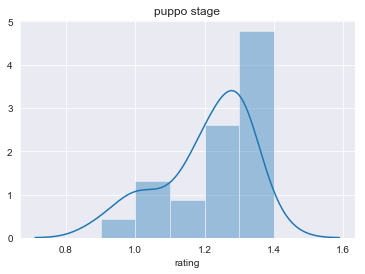

In [149]:
sns.distplot(puppo['rating'])
plt.title('puppo stage')

Text(0.5, 1.0, 'floofer stage')

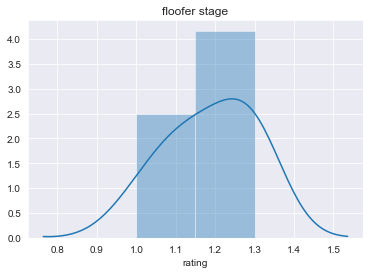

In [150]:
sns.distplot(floofer['rating'])
plt.title('floofer stage')

In [160]:
doggo.shape

(74, 16)

In [159]:
floofer.shape

(8, 16)

In [161]:
pupper.shape

(211, 16)

In [162]:
puppo.shape

(23, 16)